In [8]:
#Importing libraries
import pandas as pd
import numpy as np

#visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
#Reading the three datasets
dict_df = pd.read_csv("dictionary.csv")
summer_df = pd.read_csv("summer.csv")
winter_df = pd.read_csv("winter.csv")

### **DATA CLEANING & UNDERSTANDING**

In [10]:
dict_df.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [11]:
summer_df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [12]:
summer_df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [13]:
winter_df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


### **OBSERVATIONS**
Here are my observations from the three datasets:

I'm going to grouped the datasets into two, i.e 
1. Summer Olympics
2. Winter Olympics

I'II merge Summer and dict dataframe to have Summer Olympics

Also, I'II merge Winter and dict dataframe to have Winter Olympics

Looking at the three datasets, I noticed column "Code" from dict dataframe and column "Country" from winter and summer dataframe are kind of similar. Now, Since I want to merge the dataframe, the best approach is to change the column "Country" in Winter nad Summer to "Code" so that i can merge them.

In [14]:
#To change the feature country to code
summer_df.rename(columns={"Country": "Code"}, inplace =True)
winter_df.rename(columns={"Country": "Code"}, inplace =True)

In [15]:
summer_df.head() #To see  the changes

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver



From the code above, we now have two datasets, Winter Olympics and Summer Olympics. First, I'II be working on the-
### **SUMMER OLYMPICS** 

In [16]:
#Check the describtion of the numeric features
summer_df.describe()

,Year
count,31165.000000
mean,1970.482785
std,33.158416
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


From the code above, the dataset goes from 1896 t0 2012.

In [17]:
#Check the describtion of the categorical  features
summer_df.describe(include=['O'])

,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
count,31165,31165,31165,31165,31161,31165,31165,31165
unique,22,43,67,22762,147,2,666,3
top,London,Aquatics,Athletics,"PHELPS, Michael",USA,Men,Football,Gold
freq,3567,4170,3638,22,4585,22746,1497,10486


**Observations**

* USA has the highest number of medal
* London has the majority of the medal where the game was hosted 
* The sport Aquatics has the majority of the medals
  



In [18]:
#To see the summary of the datatypes
summer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Code        31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


### **SUMMER DATASET DESCRIPTION**
***Features and Description:***

1. **Country** : The country that participated in the Olympics code

2. **Code** : The abbreviation of the country

3. **Population** : Numbers of population that was present for the olympics

4. **GDP per Capita**

5. **Year** : The year of the olympics games

6. **City** : The City that host the games

7. **Sport** : The kind of sport that happened in the games

8. **Discpline** : Specialization of the type of sport that Atlete contetsted for.

9. **Gender** : Contestant that was present 1.e Male or Female

10. **Event** : Events in the Olympics

11. **Medal** : Awards presented to the Winner. Gold, Silver or Bronze.

In [19]:
#To see first few rows
summer_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [20]:
#To see the last few rows
summer_df.tail()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze
31164,2012,London,Wrestling,Wrestling Freestyle,"LIDBERG, Jimmy",SWE,Men,Wg 96 KG,Bronze


In [21]:
summer_df.shape

(31165, 9)

From the above code, we have 31165 rows and 9 columns(features)

In [22]:
#To check if the headers is well written
summer_df.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Code', 'Gender',
       'Event', 'Medal'],
      dtype='object')

In [23]:
#Checking for the number of each data type----
df_numeric = summer_df.select_dtypes(include='number') # extract columns with number
num = len(df_numeric.columns) # sum the columns extracted
print(f'We have {num} numeric columns') #format string

df_obj = summer_df.select_dtypes(include='object')
num_2 = len(df_obj.columns)
print(f'we have {num_2} object columns')

df_bool = summer_df.select_dtypes(include='bool')
num_3 = len(df_bool.columns)
print(f'we have {num_3} boolean columns')

print(f'With a total number of {num + num_2 + num_3} columns')

We have 1 numeric columns
we have 8 object columns
we have 0 boolean columns
With a total number of 9 columns


In [24]:
#To check if there is missing data in the datframe
summer_df.isnull().values.any()

np.True_


From the above code we can see there are missing data in the dataframe. We need to find percentage of missing data and drop all neccesary rows or columns.

In [25]:
#Checking for the percentage of the missing data

#creating a dataframe for percebtage of missing data
percentage_of_missing_data = pd.DataFrame({'Percentage of Missing of Data':round((summer_df.isnull().sum()/len(summer_df.index)) * 100,2)}) 
percentage_of_missing_data = percentage_of_missing_data.sort_values(by='Percentage of Missing of Data',ascending=False)
percentage_of_missing_data

,Percentage of Missing of Data
Code,0.01
Year,0.00
City,0.00
Discipline,0.00
Sport,0.00
Athlete,0.00
Gender,0.00
Event,0.00
Medal,0.00


In [26]:
#We have small percentage of missing value (2.33%), we will drop rows with missing data.
summer_df = summer_df.dropna()
summer_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [27]:
#To check if there is still missing data
summer_df.isnull().sum().any()

np.False_

Now, we don't have any mising data.

In [28]:
#To check for unique items in our categorical Features
summer_df.nunique() 

Year             27
City             22
Sport            43
Discipline       67
Athlete       22761
Code            147
Gender            2
Event           666
Medal             3
dtype: int64

In [29]:
#Checking to see the unique Country
print(summer_df.Code.unique())
print(f'Total number of Country that participated in the Olympic games from 1896 10 2012: {len(summer_df.Code.unique())}')

['HUN' 'AUT' 'GRE' 'USA' 'GER' 'GBR' 'FRA' 'AUS' 'DEN' 'SUI' 'ZZX' 'NED'
 'BEL' 'IND' 'CAN' 'BOH' 'SWE' 'NOR' 'ESP' 'ITA' 'CUB' 'ANZ' 'RSA' 'FIN'
 'RU1' 'EST' 'TCH' 'NZL' 'BRA' 'JPN' 'LUX' 'ARG' 'POL' 'POR' 'URU' 'YUG'
 'ROU' 'HAI' 'EGY' 'PHI' 'IRL' 'CHI' 'LAT' 'MEX' 'TUR' 'PAN' 'JAM' 'SRI'
 'KOR' 'PUR' 'PER' 'IRI' 'TRI' 'URS' 'VEN' 'BUL' 'LIB' 'EUA' 'ISL' 'PAK'
 'BAH' 'BWI' 'TPE' 'ETH' 'MAR' 'GHA' 'IRQ' 'SIN' 'TUN' 'KEN' 'NGR' 'GDR'
 'FRG' 'UGA' 'CMR' 'MGL' 'PRK' 'COL' 'NIG' 'THA' 'BER' 'TAN' 'GUY' 'ZIM'
 'CHN' 'CIV' 'ZAM' 'DOM' 'ALG' 'SYR' 'SUR' 'CRC' 'INA' 'SEN' 'DJI' 'AHO'
 'ISV' 'EUN' 'NAM' 'QAT' 'LTU' 'MAS' 'CRO' 'ISR' 'SLO' 'IOP' 'RUS' 'UKR'
 'ECU' 'BDI' 'MOZ' 'CZE' 'BLR' 'TGA' 'KAZ' 'UZB' 'SVK' 'MDA' 'GEO' 'HKG'
 'ARM' 'AZE' 'BAR' 'KSA' 'KGZ' 'KUW' 'VIE' 'MKD' 'SCG' 'ERI' 'PAR' 'UAE'
 'SRB' 'SUD' 'MRI' 'TOG' 'TJK' 'AFG' 'BRN' 'GUA' 'GRN' 'TTO' 'BOT' 'MNE'
 'CYP' 'SGP' 'GAB']
Total number of Country that participated in the Olympic games from 1896 10 2012: 147


In [30]:
#checking to see the  uniques year
print(summer_df.Year.unique())
print(f"The total number of years: {len(summer_df.Year.unique())}")

[1896 1900 1904 1908 1912 1920 1924 1928 1932 1936 1948 1952 1956 1960
 1964 1968 1972 1976 1980 1984 1988 1992 1996 2000 2004 2008 2012]
The total number of years: 27


In [31]:
#checking to see the  host city
print(summer_df.City.unique())
print(f"The total number of host City: {len(summer_df.City.unique())}")

['Athens' 'Paris' 'St Louis' 'London' 'Stockholm' 'Antwerp' 'Amsterdam'
 'Los Angeles' 'Berlin' 'Helsinki' 'Melbourne / Stockholm' 'Rome' 'Tokyo'
 'Mexico' 'Munich' 'Montreal' 'Moscow' 'Seoul' 'Barcelona' 'Atlanta'
 'Sydney' 'Beijing']
The total number of host City: 22


In [32]:
#checking to see the  unique Sport
print(summer_df.Sport.unique())
print(f"The total number of Sport: {len(summer_df.Sport.unique())}")

['Aquatics' 'Athletics' 'Cycling' 'Fencing' 'Gymnastics' 'Shooting'
 'Tennis' 'Weightlifting' 'Wrestling' 'Archery' 'Basque Pelota' 'Cricket'
 'Croquet' 'Equestrian' 'Football' 'Golf' 'Polo' 'Rowing' 'Rugby'
 'Sailing' 'Tug of War' 'Boxing' 'Lacrosse' 'Roque' 'Hockey'
 'Jeu de paume' 'Rackets' 'Skating' 'Water Motorsports'
 'Modern Pentathlon' 'Ice Hockey' 'Basketball' 'Canoe / Kayak' 'Handball'
 'Judo' 'Volleyball' 'Table Tennis' 'Badminton' 'Baseball' 'Softball'
 'Taekwondo' 'Triathlon' 'Canoe']
The total number of Sport: 43


In [33]:
#checking to see the  unique Event
# print(summer_df.Event.unique())
print(f"The total number of Event: {len(summer_df.Event.unique())}")

The total number of Event: 666


In [34]:
#checking to see the  unique Discipline
print(summer_df.Discipline.unique())
print(f"The total number of Discipline: {len(summer_df.Discipline.unique())}")

['Swimming' 'Athletics' 'Cycling Road' 'Cycling Track' 'Fencing'
 'Artistic G.' 'Shooting' 'Tennis' 'Weightlifting' 'Wrestling Gre-R'
 'Water polo' 'Archery' 'Basque Pelota' 'Cricket' 'Croquet' 'Jumping'
 'Football' 'Golf' 'Polo' 'Rowing' 'Rugby' 'Sailing' 'Tug of War' 'Diving'
 'Boxing' 'Lacrosse' 'Roque' 'Wrestling Free.' 'Hockey' 'Jeu de Paume'
 'Rackets' 'Figure skating' 'Water Motorspor' 'Dressage' 'Eventing'
 'Modern Pentath.' 'Vaulting' 'Ice Hockey' 'Basketball' 'Canoe / Kayak F'
 'Handball' 'Judo' 'Volleyball' 'Canoe / Kayak S' 'Synchronized S.'
 'Rhythmic G.' 'Table Tennis' 'Badminton' 'Baseball' 'Mountain Bike'
 'Softball' 'Beach volley.' 'Trampoline' 'Taekwondo' 'Triathlon' 'BMX'
 'Marathon swimming' 'Synchronized Swimming' 'Water Polo' 'Canoe Slalom'
 'Canoe Sprint' 'Cycling BMX' 'Gymnastics Artistic' 'Gymnastics Rhythmic'
 'Modern Pentathlon' 'Beach Volleyball' 'Wrestling Freestyle']
The total number of Discipline: 67


As per the above data we have 43 sports, 67 discipline, and 666 events in summer Olympics.

We can see Sport is differnet from Disclipline. We can say column "Discipline" is a subset of column "Sport".

In [35]:
#checking to see the  uniques Athletes
print(summer_df.Athlete.unique())
print(f"The total number of Athlete: {len(summer_df.Athlete.unique())}")

['HAJOS, Alfred' 'HERSCHMANN, Otto' 'DRIVAS, Dimitrios' ...
 'TOTROV, Rustam' 'ALEKSANYAN, Artur' 'LIDBERG, Jimmy']
The total number of Athlete: 22761


In [36]:
#checking to see the  unique Medal
print(summer_df.Medal.unique())
print(f"The total number of Medal: {len(summer_df.Medal.unique())}")

['Gold' 'Silver' 'Bronze']
The total number of Medal: 3


### **TOP COUNTRIES PARTICIPATION:**

In [37]:
#Top Countries Participating in Summer Olympics
Top_Countries =summer_df.value_counts(["Code"]).reset_index(name= "Counts")[:10]
Top_Countries

,Code,Counts
0,USA,4585
1,URS,2049
2,GBR,1720
3,FRA,1396
4,GER,1305
5,ITA,1296
6,AUS,1189
7,HUN,1079
8,SWE,1044
9,NED,851


C:\Users\KC\AppData\Local\Temp\ipykernel_11148\548131544.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(rotation=50, labels=Top_Countries.Code)


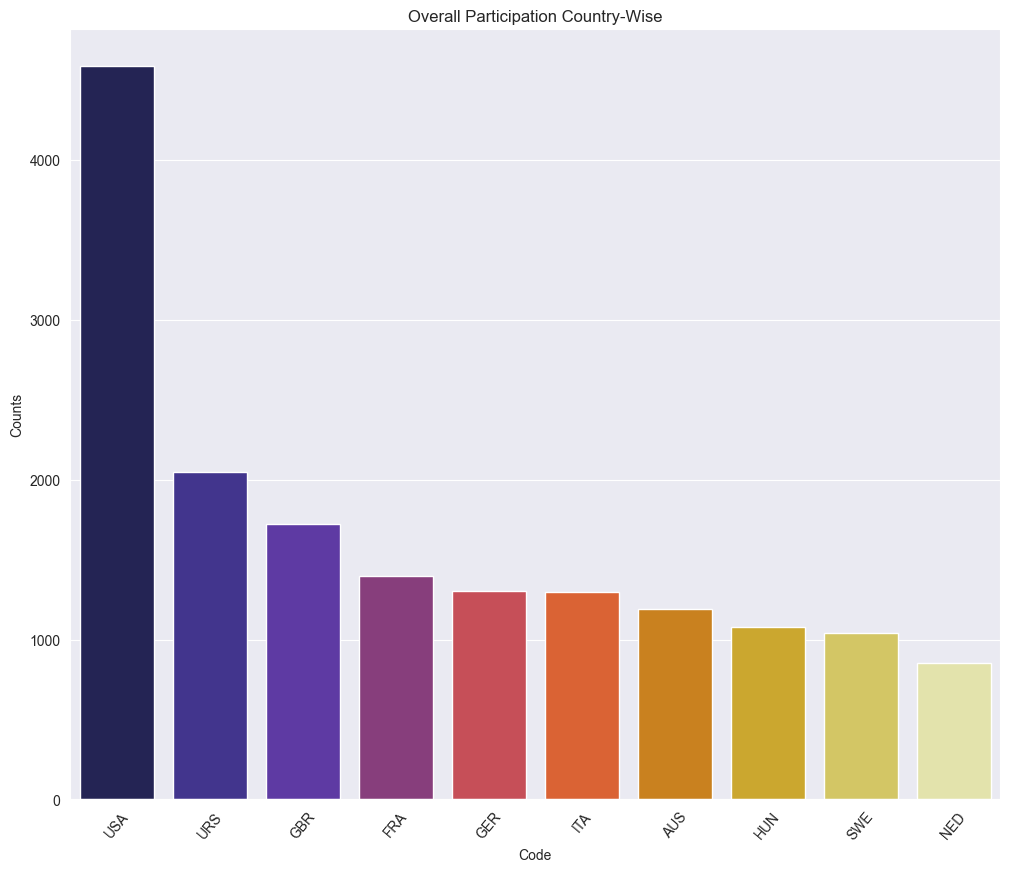

In [38]:
sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize'] = (12, 10)

plt.title("Overall Participation Country-Wise")
barplot = sns.barplot(data=Top_Countries, x="Code", y="Counts", hue="Code", palette="CMRmap", dodge=False)
barplot.set_xticklabels(rotation=50, labels=Top_Countries.Code)
plt.ylabel("Counts")
plt.show()

As USA has historically won maximum no of medals it would make sense the participation is highest from USA.

### **GENDER PARTICIPATION:**

In [39]:
Gender_Counts =summer_df.value_counts(["Gender"]).reset_index(name= "Counts")[:10]

#To get the percentage
Gender_Counts['Percentage %'] = round(Gender_Counts.Counts / Gender_Counts.Counts.sum() * 100, 2)

Gender_Counts

,Gender,Counts,Percentage %
0,Men,22744,72.99
1,Women,8417,27.01


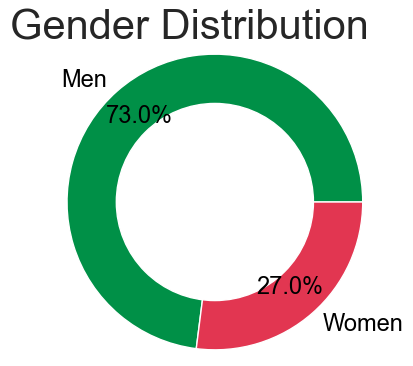

In [65]:
plt.figure(figsize=(10,4))
Gender_percentage = Gender_Counts["Percentage %"].to_list()
plt.title('Gender Distribution', fontsize=30, loc='Right')
plt.pie(Gender_percentage, colors=['#009047','#E23651'], labels= ["Men", "Women"], radius=1.2, autopct= "%0.1f%%", pctdistance = 0.77,
        textprops = {"size" : 17, "color" : "#000000"}, explode= [0.00, 0.00])

centre_circle = plt.Circle((0,0), 0.8, fc = "w")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

Male seems to be dominating in terms of participation. I used colors from Olympic logo for the doungnurt chart

I'm curious to know the female participants across the years.

In [41]:
#To filter gender that are  female and Year
female_participants = summer_df[(summer_df["Gender"] == "Women")][["Gender", "Year"]]

#To group by year
female_participants = female_participants.groupby('Year').count().reset_index()
female_participants

,Year,Gender
0,1900,11
1,1904,12
2,1908,15
3,1912,30
4,1920,43
5,1924,51
6,1928,95
7,1932,60
8,1936,84
9,1948,96


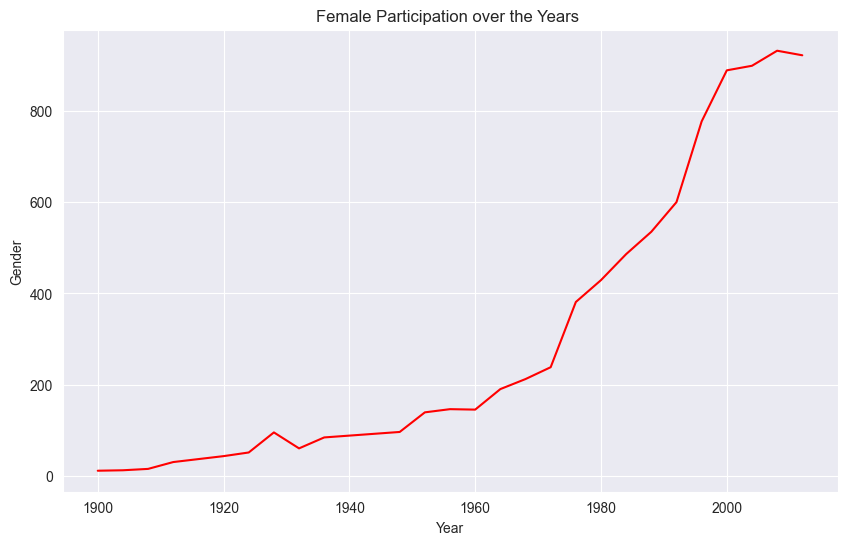

In [42]:
sns.set_style('darkgrid')
# matplotlib.rcParams['figure.figsize'] = (12, 10)
plt.figure(figsize=(10,6))
sns.lineplot(data=female_participants, x='Year', y='Gender', color= "red")
plt.title("Female Participation over the Years ")

plt.show()

From the chart above, we can see the Women has increased signifiacntly across the years.

In [43]:
Gender_by_Medals = pd.crosstab(summer_df["Gender"],summer_df["Medal"])
Gender_by_Medals

Medal,Bronze,Gold,Silver
Gender,,,
Men,7539,7698,7507
Women,2830,2786,2801


I'II be using stack barplot to visualize the Gender by Male.

Stacking basciaclly means moving inner coulumns to beacome the inner rows index.

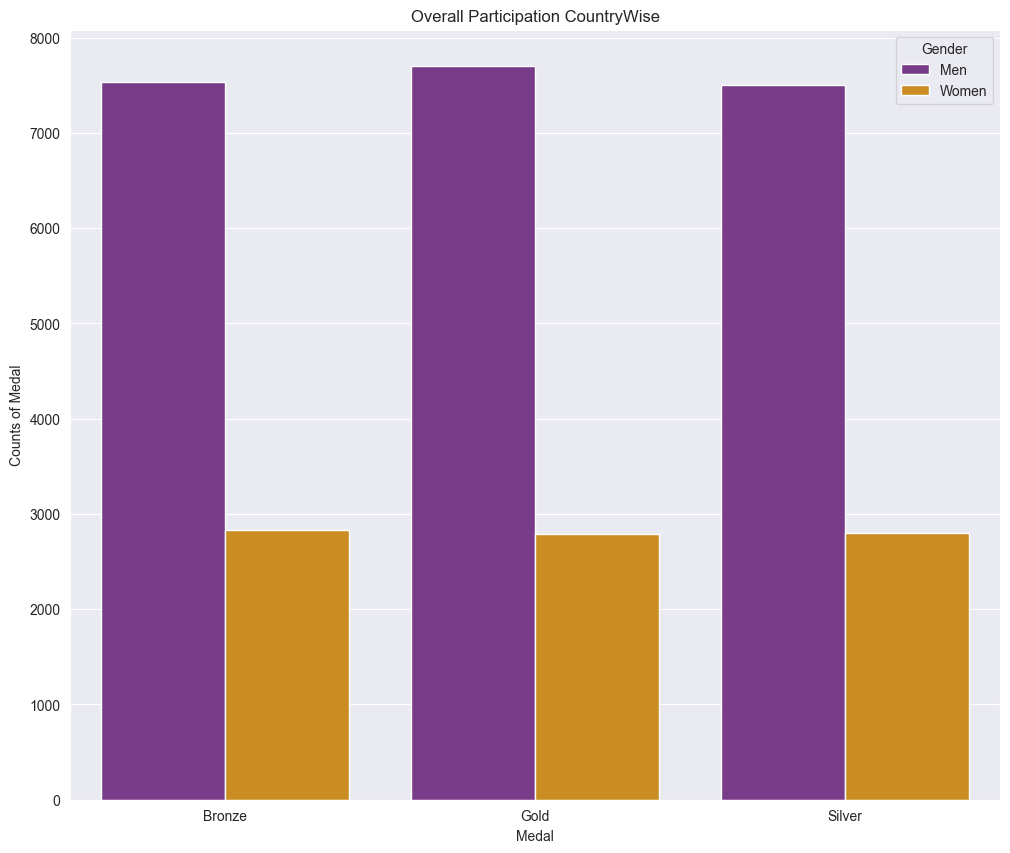

In [44]:
sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize'] = (12, 10)
plt.title("Overall Participation CountryWise")

#To moved the Medal to become the inner row index
stacked = Gender_by_Medals.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.Medal, y=stacked.value, hue=stacked.Gender, palette="CMRmap")
plt.ylabel("Counts of Medal")
plt.show()

# **SUMMER OLYMPICS DATA ANALYSIS ASSIGNMENT**

---



## **1. In how many cities Summer Olympics is held so far?**

In [45]:
#checking to see the  host city
print(summer_df.City.unique())
print(f"\nThe total number of cities Summer Olympics is held so far: {len(summer_df.City.unique())}")

['Athens' 'Paris' 'St Louis' 'London' 'Stockholm' 'Antwerp' 'Amsterdam'
 'Los Angeles' 'Berlin' 'Helsinki' 'Melbourne / Stockholm' 'Rome' 'Tokyo'
 'Mexico' 'Munich' 'Montreal' 'Moscow' 'Seoul' 'Barcelona' 'Atlanta'
 'Sydney' 'Beijing']

The total number of cities Summer Olympics is held so far: 22



## **2. Which sport is having most number of Gold Medals so far? (Top 5)**


In [46]:
gold = []
gold_data = summer_df[summer_df['Medal']=='Gold']

for sport in gold_data['Sport'].unique():
    gold.append([sport,len(gold_data[gold_data['Sport']==sport])])

print(f"SPORTS HAVING MOST NUMBER OF GOLD MEDALS:\n")

gold = pd.DataFrame(gold,columns=['Sport','Count_of_Gold_Medals'])
c=gold.sort_values(by='Count_of_Gold_Medals',ascending=False).head(5)
c

SPORTS HAVING MOST NUMBER OF GOLD MEDALS:



,Sport,Count_of_Gold_Medals
0,Aquatics,1421
1,Athletics,1214
17,Rowing,890
4,Gymnastics,820
3,Fencing,552


C:\Users\KC\AppData\Local\Temp\ipykernel_11148\3812304461.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(rotation=50, labels=c.Sport)


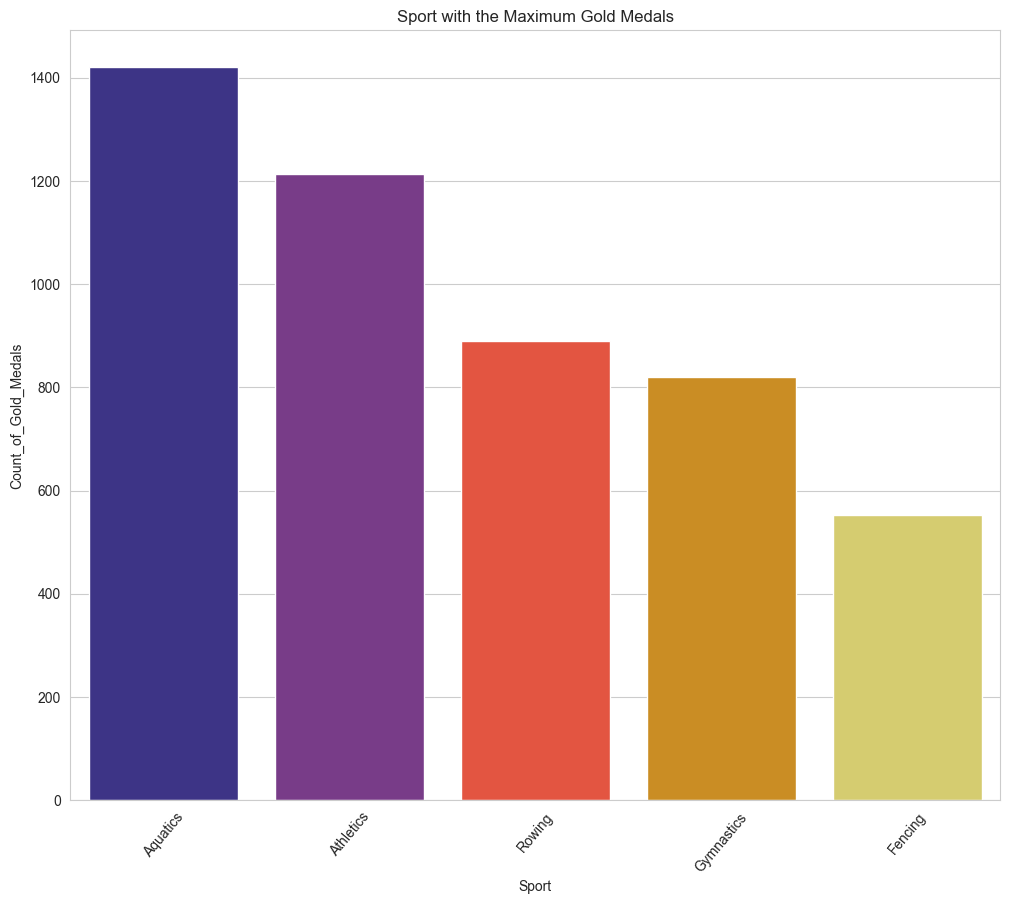

In [47]:
sns.set_style('whitegrid')
matplotlib.rcParams['figure.figsize'] = (12, 10)

plt.title("Sport with the Maximum Gold Medals")
barplot = sns.barplot(data=c, x="Sport", y="Count_of_Gold_Medals", hue="Sport", palette="CMRmap", dodge=False)
barplot.set_xticklabels(rotation=50, labels=c.Sport)
plt.ylabel("Count_of_Gold_Medals")
plt.show()

<Axes: ylabel='count'>

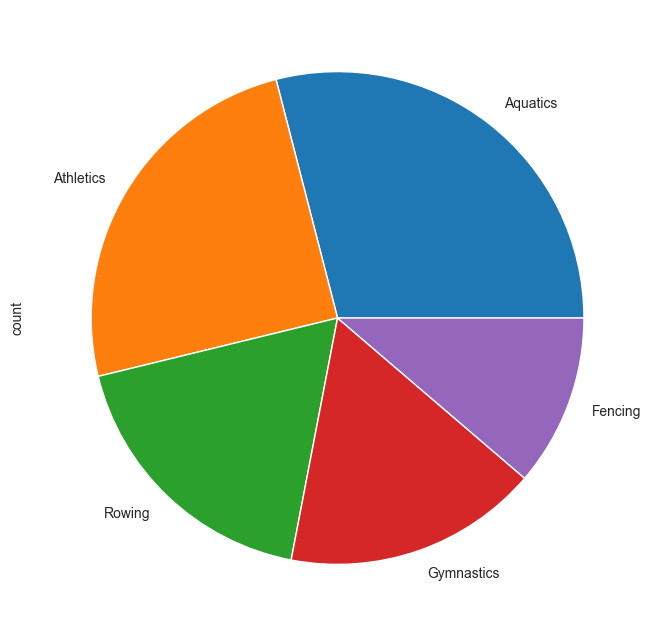

In [48]:
gold_data['Medal'].unique()
gold=gold_data[gold_data['Medal'] == 'Gold']
gold['Sport'].value_counts().head().plot.pie(figsize = (8,8))

## **3. Which sport is having most number of medals so far? (Top 5)** 

In [49]:
Most_number_medal = summer_df[["Sport","Medal"]]
Most_number_medal = Most_number_medal.value_counts("Sport").reset_index(name="Counts_of_Medals")[:5]
print(f"SPORTS HAVING MOST NUMBER OF MEDALS:\n")
Most_number_medal

SPORTS HAVING MOST NUMBER OF MEDALS:



,Sport,Counts_of_Medals
0,Aquatics,4170
1,Athletics,3637
2,Rowing,2667
3,Gymnastics,2307
4,Fencing,1613


C:\Users\KC\AppData\Local\Temp\ipykernel_11148\2777925641.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(rotation=50, labels=Most_number_medal.Sport)


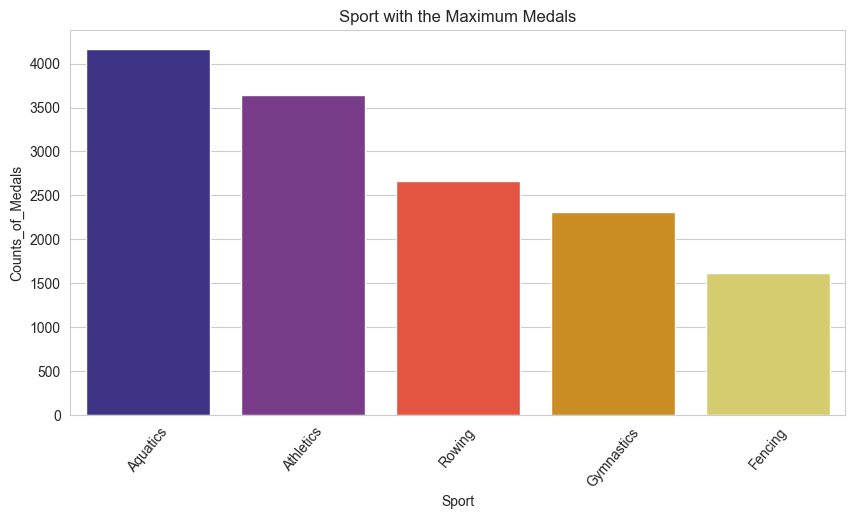

In [67]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
matplotlib.rcParams['figure.figsize'] = (12, 10)

plt.title("Sport with the Maximum Medals")
barplot = sns.barplot(data=Most_number_medal, x="Sport", y="Counts_of_Medals", hue="Sport", palette="CMRmap", dodge=False)
barplot.set_xticklabels(rotation=50, labels=Most_number_medal.Sport)
plt.ylabel("Counts_of_Medals")
plt.show()

## **4. Which player has won most number of medals? (Top 5)**

In [51]:
Individual_medal = summer_df[["Athlete","Medal"]]
Individual_medal['Athlete'].unique()
Individual_medal = Individual_medal.value_counts("Athlete").reset_index(name="Counts_of_Medals")[:5]
print(f"PLAYERS WHO WON MOST NUMBER OF MEDALS:\n")
Individual_medal

PLAYERS WHO WON MOST NUMBER OF MEDALS:



,Athlete,Counts_of_Medals
0,"PHELPS, Michael",22
1,"LATYNINA, Larisa",18
2,"ANDRIANOV, Nikolay",15
3,"SHAKHLIN, Boris",13
4,"MANGIAROTTI, Edoardo",13


C:\Users\KC\AppData\Local\Temp\ipykernel_11148\3059031435.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(rotation=50, labels=Individual_medal.Athlete)


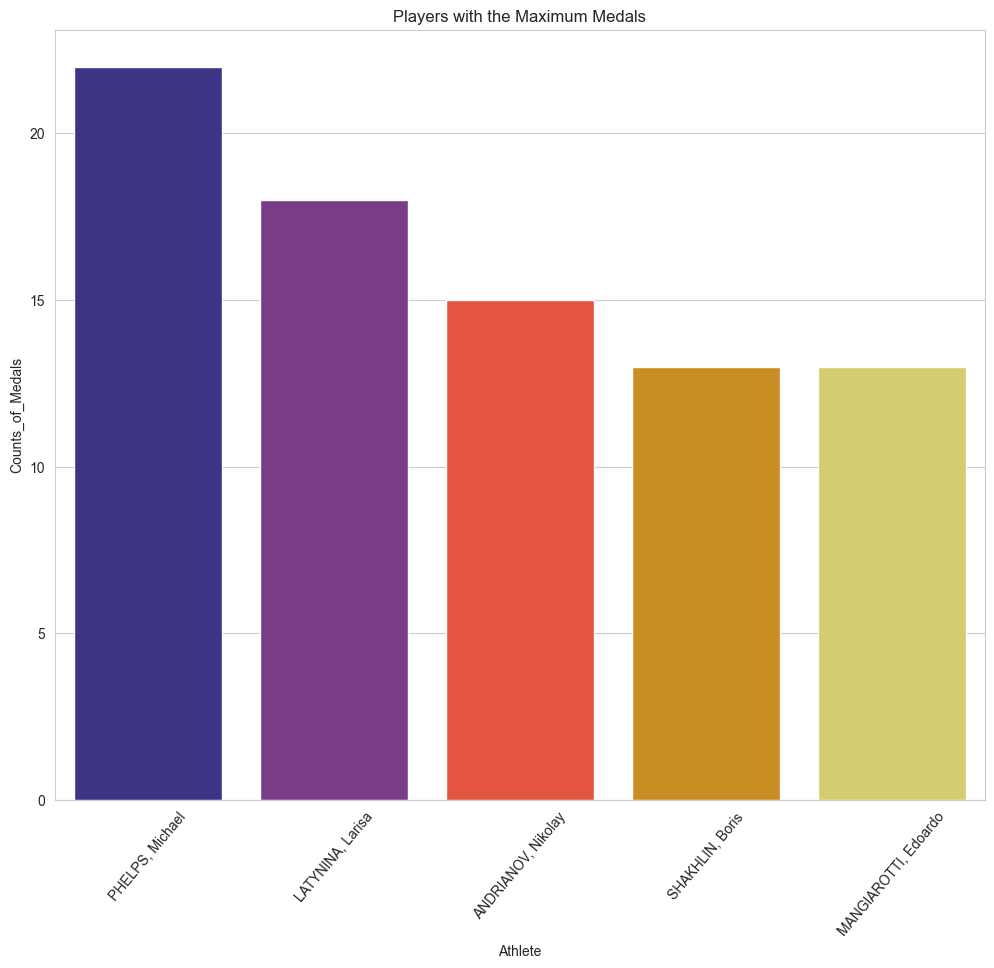

In [52]:
sns.set_style('whitegrid')
matplotlib.rcParams['figure.figsize'] = (12, 10)

plt.title("Players with the Maximum Medals")
barplot = sns.barplot(data=Individual_medal, x="Athlete", y="Counts_of_Medals", hue="Athlete", palette="CMRmap", dodge=False)
barplot.set_xticklabels(rotation=50, labels=Individual_medal.Athlete)
plt.ylabel("Counts_of_Medals")
plt.show()

## **5. Which player has won most number Gold Medals of medals? (Top 5)**

In [53]:
Gold_medal = summer_df[(summer_df["Medal"] == "Gold")][["Athlete", "Medal"]]
Gold_medal = Gold_medal.value_counts(["Athlete"]).reset_index(name = "Counts_of_Gold_Medal")[:5]
print(f"PLAYERS WHO WON MOST NUMBER OF GOLD MEDALS:\n")
Gold_medal

PLAYERS WHO WON MOST NUMBER OF GOLD MEDALS:



,Athlete,Counts_of_Gold_Medal
0,"PHELPS, Michael",18
1,"LEWIS, Carl",9
2,"LATYNINA, Larisa",9
3,"NURMI, Paavo",9
4,"SPITZ, Mark",9


C:\Users\KC\AppData\Local\Temp\ipykernel_11148\1951160897.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(rotation=50, labels=Gold_medal.Athlete)


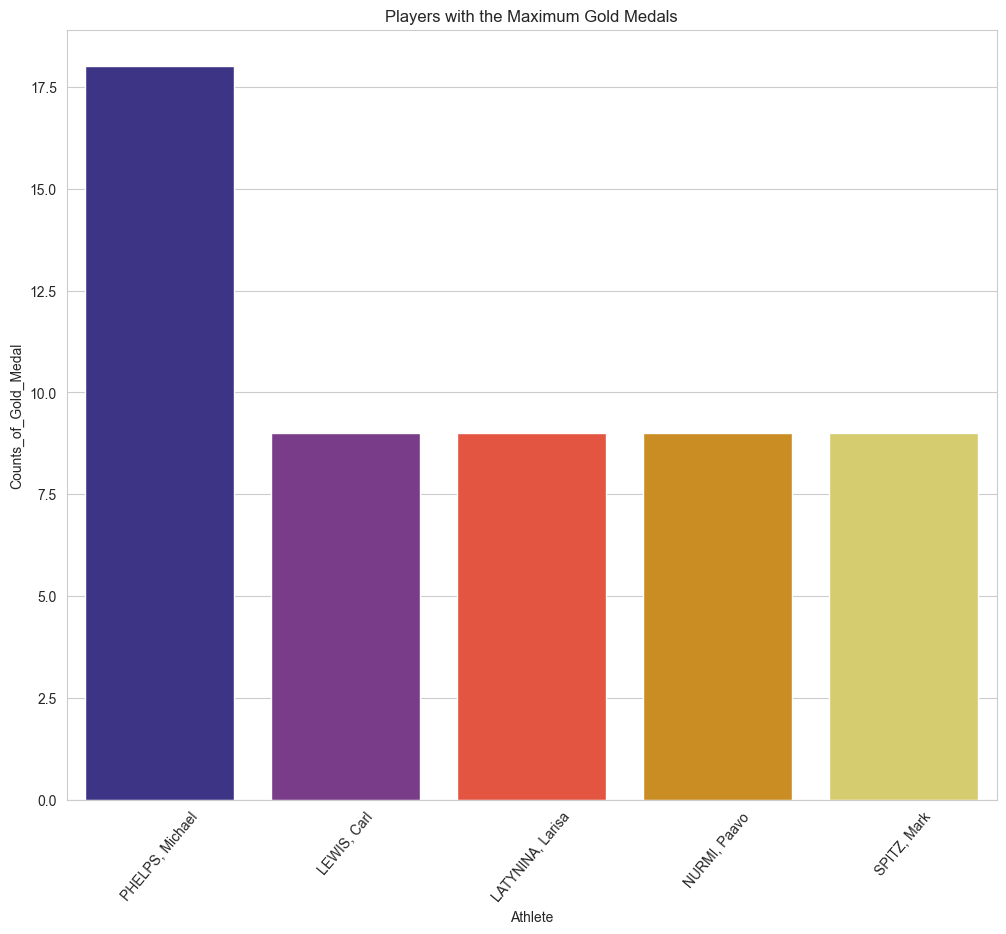

In [54]:
sns.set_style('whitegrid')
matplotlib.rcParams['figure.figsize'] = (12, 10)

plt.title("Players with the Maximum Gold Medals")
barplot = sns.barplot(data=Gold_medal, x="Athlete", y="Counts_of_Gold_Medal", hue="Athlete", palette="CMRmap", dodge=False)
barplot.set_xticklabels(rotation=50, labels=Gold_medal.Athlete)
plt.ylabel("Counts_of_Gold_Medal")
plt.show()

## **6. In which year India won first Gold Medal in Summer Olympics?**

In [55]:
# Making a new dataset which contains only the sports in which atleast one gold medal is won.
gold_dataset= summer_df[summer_df["Medal"]=="Gold"]
gold_dataset.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold


In [56]:
First_Medal = gold_data[gold_data['Medal'] == 'Gold']
Firstmedal_India = First_Medal[First_Medal['Code'] == 'IND']
 
lstt = []
for i in Firstmedal_India['Year'].unique():
     lstt.append(i)
min(lstt)
print(f"INDIA WON FIRST GOLD MEDAL IN SUMMER OLYMPICS: {min(lstt)}")

INDIA WON FIRST GOLD MEDAL IN SUMMER OLYMPICS: 1928


In [57]:
India_goldmedals=gold_dataset[gold_dataset["Code"]=="IND"]
India_goldmedals=India_goldmedals.sort_values(by="Year", ascending=True)
print(f"INDIA WON FIRST GOLD MEDAL IN SUMMER OLYMPICS:\n")
India_goldmedals.head(1)

INDIA WON FIRST GOLD MEDAL IN SUMMER OLYMPICS:



,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold


In [58]:
Country_by_medal = summer_df[(summer_df["Code"] == "IND")][["Sport", "Medal"]]
Country_by_medal = Country_by_medal.value_counts(["Sport"]).reset_index(name = "Counts_of_Medal")[:10]
print(f"TOTAL MEDALS WON BY INDIA IN SUMMER OLYMPICS:\n")
Country_by_medal

TOTAL MEDALS WON BY INDIA IN SUMMER OLYMPICS:



,Sport,Counts_of_Medal
0,Hockey,169
1,Shooting,4
2,Wrestling,4
3,Athletics,2
4,Boxing,2
5,Badminton,1
6,Tennis,1
7,Weightlifting,1


C:\Users\KC\AppData\Local\Temp\ipykernel_11148\408633363.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(rotation=0, labels=Country_by_medal.Sport)


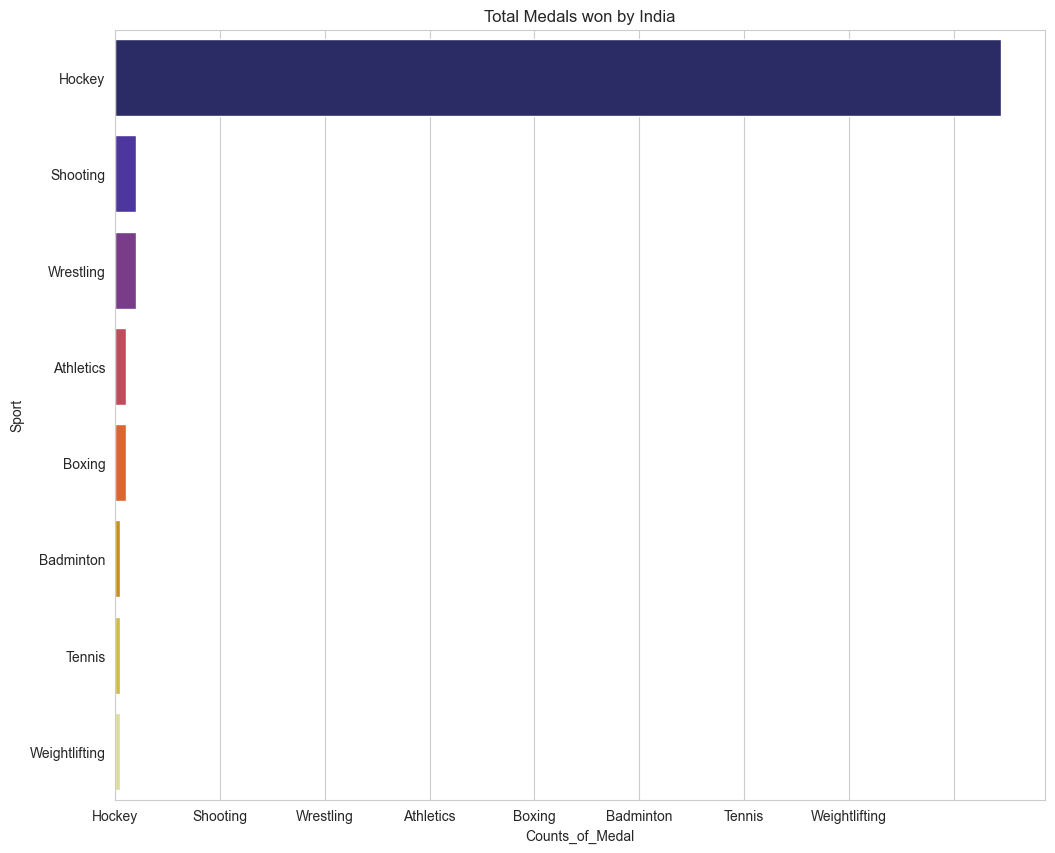

In [59]:
sns.set_style('whitegrid')
matplotlib.rcParams['figure.figsize'] = (12, 10)

plt.title("Total Medals won by India")
barplot = sns.barplot(data=Country_by_medal, y="Sport", x="Counts_of_Medal", hue="Sport", palette="CMRmap", dodge=False)
barplot.set_xticklabels(rotation=0, labels=Country_by_medal.Sport)
plt.xlabel("Counts_of_Medal")
plt.show()

## **7. Which event is most popular in terms on number of players? (Top 5)**

In [60]:
Number_of_players = summer_df[["Event","Athlete"]]
Number_of_players = Number_of_players.value_counts("Event").reset_index(name="No_of_players")[:5]
print(f"MOST POPULAR EVENT IN TERMS ON NUMBER OF PLAYERS:\n")
Number_of_players

MOST POPULAR EVENT IN TERMS ON NUMBER OF PLAYERS:



,Event,No_of_players
0,Football,1497
1,Hockey,1422
2,Team Competition,1147
3,Basketball,1012
4,Handball,973


C:\Users\KC\AppData\Local\Temp\ipykernel_11148\707546964.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(rotation=50, labels=Number_of_players.Event)


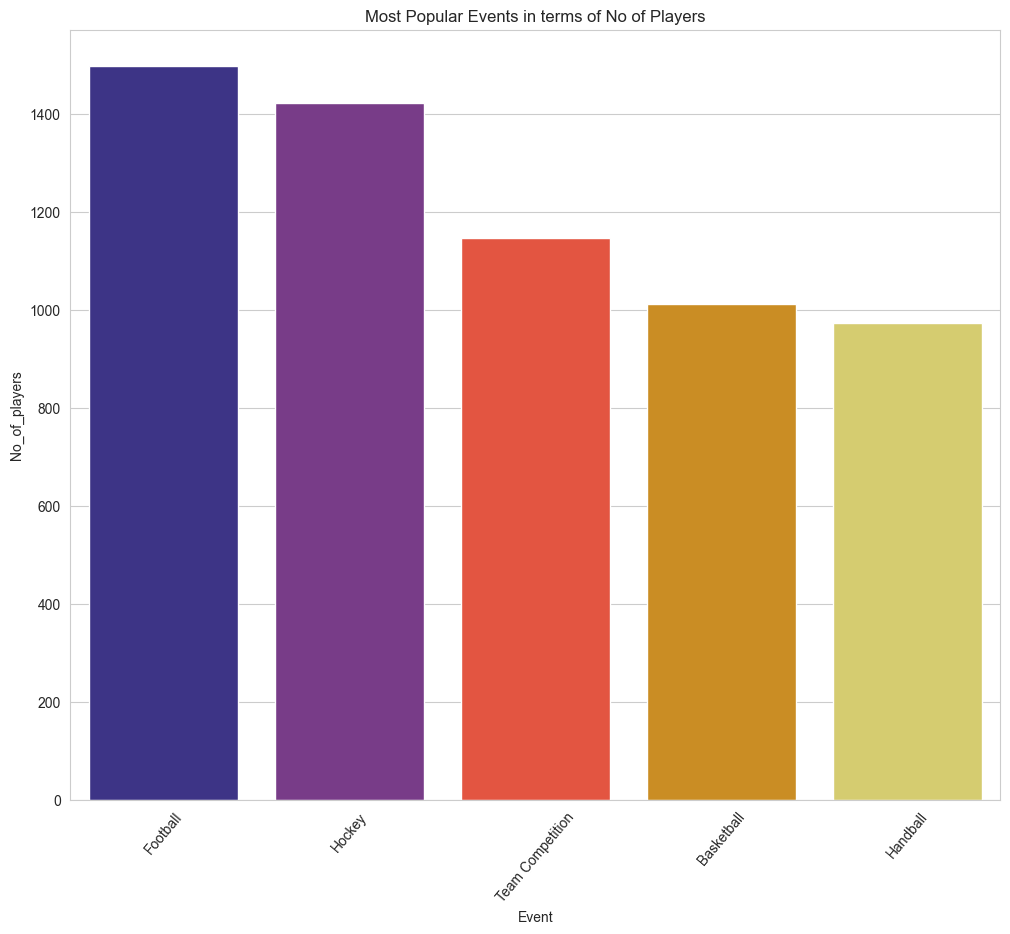

In [61]:
sns.set_style('whitegrid')
matplotlib.rcParams['figure.figsize'] = (12, 10)

plt.title("Most Popular Events in terms of No of Players")
barplot = sns.barplot(data=Number_of_players, x="Event", y="No_of_players", hue="Event", palette="CMRmap", dodge=False)
barplot.set_xticklabels(rotation=50, labels=Number_of_players.Event)
plt.ylabel("No_of_players")
plt.show()

## **8. Which sport is having most female Gold Medalists? (Top 5)**

In [62]:
Female_gold_medalists = summer_df[(summer_df["Medal"] == "Gold") & (summer_df["Gender"] == "Women")][["Sport", "Medal"]]
Female_gold_medalists = Female_gold_medalists.value_counts(["Sport"]).reset_index(name = "Female_gold_medalists")[:5]
print(f"\nFEMALE GOLD MEDALISTS IN SUMMER OLYMPICS:\n")
Female_gold_medalists


FEMALE GOLD MEDALISTS IN SUMMER OLYMPICS:



,Sport,Female_gold_medalists
0,Aquatics,589
1,Athletics,388
2,Gymnastics,268
3,Rowing,217
4,Volleyball,166


C:\Users\KC\AppData\Local\Temp\ipykernel_11148\1673606662.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(rotation=50, labels=Female_gold_medalists.Sport)


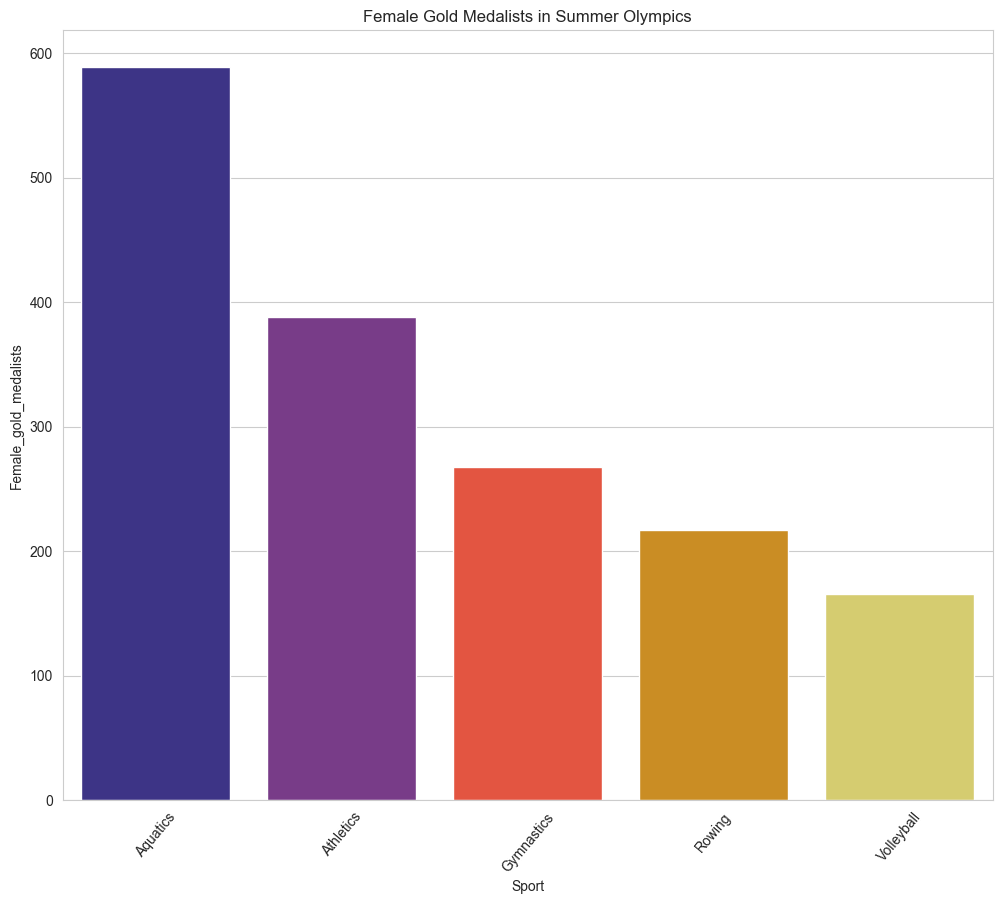

In [63]:
sns.set_style('whitegrid')
matplotlib.rcParams['figure.figsize'] = (12, 10)

plt.title("Female Gold Medalists in Summer Olympics")
barplot = sns.barplot(data=Female_gold_medalists, x="Sport", y="Female_gold_medalists", hue="Sport", palette="CMRmap", dodge=False)
barplot.set_xticklabels(rotation=50, labels=Female_gold_medalists.Sport)
plt.ylabel("Female_gold_medalists")
plt.show()